#**Investigation of *items* database and correlations between items**

**EDA, NLP, Feature Generation**

Andreas Theodoulou and Michael Gaidis (May, 2020)

#0. Configure Environment
**NOT OPTIONAL**

In [1]:
# General python libraries/modules used throughout the notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
from scipy import sparse
import seaborn as sns
from numba import jit, prange

import os
from itertools import product
import re
import json
import time
from time import sleep, localtime, strftime
import pickle


# Magics
%matplotlib inline


# # NLP packages
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# # ML packages
# from sklearn.linear_model import LinearRegression

# !pip install catboost
# from catboost import CatBoostRegressor 

# %tensorflow_version 2.x
# import tensorflow as tf
# import keras as K

# # List of the modules we need to version-track for reference
modules = ['pandas','matplotlib','numpy','scipy','numba','seaborn','sklearn','tensorflow','keras','catboost','pip']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Notebook formatting
# Adjust as per your preferences.  I'm using a FHD monitor with a full-screen browser window containing my IPynb notebook

# format pandas output so we can see all the columns we care about (instead of "col1  col2  ........ col8 col9", we will see "col1 col2 col3 col4 col5 col6 col7 col8 col9" if it fits inside display.width parameter)
pd.set_option("display.max_columns",30)  
pd.set_option("display.max_rows",100)     # Override pandas choice of how many rows to show, so, for example, we can see the full 84-row item_category dataframe instead of the first few rows, then ...., then the last few rows
pd.set_option("display.width", 300)       # Similar to the above for showing more rows than pandas defaults to, we can show more columns than default, if we tune this to our monitor window size
pd.set_option("max_colwidth", None)

#pd.set_option("display.precision", 3)  # Nah, this is helpful, but below is even better
#Try to convince pandas to print without decimal places if a number is actually an integer (helps keep column width down, and highlights data types)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.3f}'.format(x)

#1. Load Data Files



##1.1) Enter Data File Names and Paths

**NOT Optional**

In [0]:
#  FYI, data is coming from a public repo on GitHub at github.com/migai/Kag
# List of the data files (path relative to GitHub master), to be loaded into pandas DataFrames
data_files = [  "readonly/final_project_data/items.csv",
                "readonly/final_project_data/item_categories.csv",
                "readonly/final_project_data/shops.csv",
                "readonly/final_project_data/sample_submission.csv.gz",
                "readonly/final_project_data/sales_train.csv.gz",
                "readonly/final_project_data/test.csv.gz",
                "data_output/shops_transl.csv",
                "data_output/shops_augmented.csv",
                "data_output/item_categories_transl.csv",
                "data_output/item_categories_augmented.csv",
                "data_output/items_transl.csv",
                #"data_output/item_word_vectors.csv.gz", #item_vectors.csv.gz",
                "readonly/en_50k.csv"  ]


# Dict of helper code files, to be loaded and imported {filepath : import_as}
code_files = {}  # not used at this time; example dict = {"helper_code/kaggle_utils_at_mg.py" : "kag_utils"}


# GitHub file location info
git_hub_url = "https://raw.githubusercontent.com/migai"
repo_name = 'Kag'
branch_name = 'master'
base_url = os.path.join(git_hub_url, repo_name, branch_name)

##1.2) Load Data Files

In [4]:
# click on the URL link presented to you by this command, get your authorization code from Google, then paste it into the input box and hit 'enter' to complete mounting of the drive
from google.colab import drive  
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
'''
############################################################
############################################################
'''
# Replace this path with the path on *your* Google Drive where the repo master branch is stored
#   (on GitHub, the remote repo is located at github.com/migai/Kag --> below is my cloned repo location)
GDRIVE_REPO_PATH = "/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag"
'''
############################################################
############################################################
'''

%cd "{GDRIVE_REPO_PATH}"

print("Loading Files from Google Drive repo into Colab...\n")

# Loop to load the data files into appropriately-named pandas DataFrames
for path_name in data_files:
    filename = path_name.rsplit("/")[-1]
    data_frame_name = filename.split(".")[0]
    exec(data_frame_name + " = pd.read_csv(path_name)")
    if data_frame_name == 'sales_train':
        sales_train['date'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y')
    print("Data Frame: " + data_frame_name)
    print(eval(data_frame_name).head(2))
    print("\n")

"""
unused at this time...

# Load in any helper functions from the code_files dictionary
#    dictionary key is the path (replace "/"" with "." when using Google Drive + Colab), 
#      and dictionary value is the module reference name
#    note that the directory chain on GitHub (and local repo) from current directory down to the .py file
#      must include a "__init__.py" file (it can be empty) in each of the directories
for filepath, module in code_files.items():
  path_name = filepath.replace("/",".")[:-3]  # Google Drive reference does not use .py, and uses a "." instead of "/" for directory delineation
  exec("import " + path_name + " as " + module)

# Sanity check test
test1 = kag_utils.add_one(2)
print(test1)
"""
optional_code = True  # in a code block: (at top of cell = notice for you; at bottom = prevents Jupyter printing """ comments)

/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag
Loading Files from Google Drive repo into Colab...

Data Frame: items
                                                              item_name  item_id  item_category_id
0                             ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]        1                76


Data Frame: item_categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1


Data Frame: shops
                       shop_name  shop_id
0  !Якутск Орджоникидзе, 56 фран        0
1  !Якутск ТЦ "Центральный" фран        1


Data Frame: sample_submission
   ID  item_cnt_month
0   0           0.500
1   1           0.500


Data Frame: sales_train
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154    

#2. Explore Data (EDA), Clean Data, and Generate Features

#2.5) ***items*** Dataset: EDA, Cleaning, Correlations, and Feature Generation

---



---



###Thoughts regarding items dataframe
Let's first look at how many training examples we have to work with...

Many of the items have similar names, but slightly different punctuation, or only very slightly different version numbers or types.  (e.g., 'Call of Duty III' vs. 'Call of Duty III DVD')

One can expect that these two items would have similar sales in general, and by grouping them into a single feature category, we can eliminate some of the overfitting that might come as a result of the relatively small ratio of (training set shop-item-date combinations = 2935849)/(total number of unique items = 22170).  (This is an average of about 132 rows in the sales_train data for each shop-item-date combination that we are using to train our model.  Our task is to produce a monthly estimate of sales (for November 2015), so it is relevant to consider training our model based on how many sales in a month vs. how many sales in the entire training set.  Given that the sales_train dataset covers the time period from January 2013 to October 2015 (34 months), we have on average fewer than 4 shop-item combinations in our training set for a given item in any given month.  Furthermore, as we are trying to predict for a particular month (*November* 2015), it is relevant to consider how many rows in our training set occur in the month of November.  The sales_train dataset contains data for two 'November' months out of the total 34 months of data.  Another simple calculation gives us an estimate that our training set contains on average 0.23 shop-item combinations per item for November months.

To summarize:

*  *sales_train* contains 34 months of data, including 2935849 shop-item-date combinations
*  *items* contains 22170 "unique" item_id values

In the *sales_train* data, we therefore have:
*  on average, 132 rows with a given shop-item pair for a given item_id
*  on average, 4 rows with a given shop-item pair for a given item_id in a given month
*  on average, 0.23 rows with a given shop-item pair for a given item_id in all months named 'November'

If we wish to improve our model predictions for the following month of November, it behooves us to use monthly grouping of sales, or, even better, November grouping of sales.  This smooths out day-to-day variations in sales for a better monthly prediction.  However, the sparse number of available rows in the *sales_train* data will contribute to inaccuracy in our model training and predictions.

Imagine if we could reduce the number of item_id values from 22170 to perhaps half that or even less.  Given that the number of rows for training (per item, on a monthly or a November basis) is so small, then such a reduction in the number of item_id values would have a big impact.  (The same is true for creating features to supplement "shop_id" so as to group and reduce the individuality of each shop - and thus effectively create, on average, more rows of training data for each shop-item pair.

###2.5.1) **Translate and Ruminate**
We will start by translating the Russian text in the dataframe, and add our ruminations on possible new features we can generate.

The dataframe *items_transl* (equivalent to *items* plus a column for English translation) is saved as a .csv file so we do not have to repeat the translation process the next time we open a Google Colab runtime.

In [6]:
print(items_transl.info())
print("\n")
print(items_transl.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
 3   en_item_name      22170 non-null  object
dtypes: int64(2), object(2)
memory usage: 692.9+ KB
None


                                                   item_name  item_id  item_category_id                                           en_item_name
22160                             ЯРМАРКА ТЩЕСЛАВИЯ (Регион)    22160                40                                   Vanity Fair (Region)
22161                       ЯРОСЛАВ. ТЫСЯЧУ ЛЕТ НАЗАД э (BD)    22161                37                YAROSLAV. Thousands of years ago e (BD)
22162                                                 ЯРОСТЬ    22162                40                                         

###2.5.2) **NLP for feature generation from items data**
Automate the search for commonality among items, and create new categorical feature to prevent overfitting from close similarity between many item names

####Investigate possibility of using NLP to reduce or regularize the items dataset

---

---


In [7]:
# much of the following is outdated... need to clean up
import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# STOPWORDS = set(stopwords.words('english'))

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
# # use wordnet??
# from nltk.corpus import wordnet as wn
# # example uses of wordnet
# w = "volume iiii"
# print(f"Lemmatization of '{w}'':", lemmatizer.lemmatize(w)) 
w = "gifts"
print(f"Lemmatization of '{w}'':", lemmatizer.lemmatize(w)) 
# wn.synsets('rus')

# Here is the approach I plan to take to look at item name similarity:
#   1) vectorize item names, with vector elements chosen as follows:
#         a) uncommon words or part numbers found inside delimiters like () or [] or / / etc.
#               1.) large "n" n-grams
#               2.) part numbers and uncommon words
#         b) uncommon words in entire item name (not only delimited words)
#         c) words used in "item_categories" names, supplemented
#         d) special descriptors like edition number, english/russian, etc.  (keep all numbers as "words")
#   2) compute cosine similarity or other method giving special weight to the above tiers
#   3) manually investigate item names with very high similarity, and combine if actually the same name
#   4) set a certain similarity limit, and item groups above that limit will form new item categories (target: 2000 categories)
#   5) check any items not in one of these new categories, and see if they are tested... if so, assign to closest of the new categories
# Run Knn on corr matrix to find useful item groupings automatically?
#
# Idea is to then use the 2000 category list instead of item name as a key feature in fitting the model, both to help
#   regularize, and to help generalize to the items in test set that are not in train set
#
# What words are "uncommon"?
#   Use the top 50,000 words in 2018 database of movie/tv subtitles from https://github.com/hermitdave/FrequencyWords
#   The en_50k dataframe has the 50,000 most-commonly found words in this database, along with a number of "counts" 
#   or appearances in that text corpus.  The word count gives us an idea of word popularity (higher count = higher popularity of use)
#   We can then do an inverse-frequency type of word characterization on our item names
# Why not use a pre-existing word vectorizer package to create our item_name vectors?...
#   because this 21,700 item database is somewhat unique in that it is heavily weighted 
#   towards Russian entertainment sales.  We don't want word vectors that ignore things 
#   like xbox versus playstation.  We want to "tweak" the vectors to help us form relevant 
#   item groups, and not just use any word in the item name to dominate in group identification
#   (We know, for example, that the word "rus" is likely to mean "Russian" in our database,
#   whereas a standard vectorizer would either characterize it as "rus" or as "ruthenium" perhaps)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatization of 'gifts'': gift


####**Delimited Groups of Words**

Investigating "special" delimited word groups (like this) or [here] or /hobbitville/ that are present in item names, and may be particularly important in creating n>1 n-grams for uniquely identifying items so that we can tell if two items are the same or nearly the same

#####Some Details on The Approach...

In [0]:
# explanation of regex string I'm using to parse the item_name
'''

^\s+|\s*[,\"\/\(\)\[\]]+\s*|\s+$

gm
1st Alternative ^\s+
^ asserts position at start of a line
\s+ matches any whitespace character (equal to [\r\n\t\f\v ])
+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)

2nd Alternative \s*[,\"\/\(\)\[\]]+\s*
\s* matches any whitespace character (equal to [\r\n\t\f\v ])
* Quantifier — Matches between zero and unlimited times, as many times as possible, giving back as needed (greedy)
Match a single character present in the list below [,\"\/\(\)\[\]]+
+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)
, matches the character , literally (case sensitive)
\" matches the character " literally (case sensitive)
\/ matches the character / literally (case sensitive)
\( matches the character ( literally (case sensitive)
\) matches the character ) literally (case sensitive)
\[ matches the character [ literally (case sensitive)
\] matches the character ] literally (case sensitive)
\s* matches any whitespace character (equal to [\r\n\t\f\v ])
* Quantifier — Matches between zero and unlimited times, as many times as possible, giving back as needed (greedy)

3rd Alternative \s+$
\s+ matches any whitespace character (equal to [\r\n\t\f\v ])
+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)
$ asserts position at the end of a line

Global pattern flags
g modifier: global. All matches (don't return after first match)
m modifier: multi line. Causes ^ and $ to match the begin/end of each line (not only begin/end of string)
'''
commented_cell = True  # prevent Jupyter from printing triple-quoted comments

In [0]:
# This cell contains no code to run; it is simply a record of some inspections that were done on the items database

# before removing undesirable characters / punctuation from the item name,
#   let's see if we can find n-grams or useful describers or common abbreviations by looking between the nasty characters
# first, let's see what characters are present in the en_item_name column
'''
nasty_symbols = re.compile('[^0-9a-zA-Z ]')
nasties = set()
for i in range(len(items_transl)):
  n = nasty_symbols.findall(items_transl.at[i,'en_item_name'])
  nasties = nasties.union(set(n))
print(nasties)
{'[', '\u200b', 'ñ', '(', ')', '.', 'à', '`', 'ó', '®', 'Á', 
'\\', 'è', '&', '-', ':', 'ë', '_', 'û', '»', '=', '+', ']', ',', 
'«', 'ú', "'", 'ö', '#', 'ä', ';', 'ü', '"', 'ô', '/', '№', 'é', 
'í', '!', '°', 'å', '*', 'ĭ', 'ð', '?', 'â'}
'''
# From the above set of nasty characters, it looks like slashes, single quotes, double quotes, parentheses, and square brackets might enclose relevant n-grams
# Let's pull everything from en_item_name that is inside ' ', " ", (), or [] and see how many unique values we get, and if they are n-grams or abbreviations, for example
# It also seems that many of the item names end in a single character "D" for example, which should be converted to DVD

# ignore the :&+' stuff for now...
# Let's set up columns for ()[]-grams, for last string in the name, and for first string in name, and for text that precedes ":", and for text that surrounds "&" or "+"
#   but first, we will strip out every nasty character except ()[]:&+'"/ and replace the nasties with spaces, then eliminating double spaces

'''
# sanity check:
really_nasty_symbols = re.compile('[^0-9a-zA-Z \(\)\[\]:&+\'"/]')
really_nasties = set()
for i in range(len(items_transl)):
  rn = really_nasty_symbols.findall(items_transl.at[i,'en_item_name'])
  really_nasties = really_nasties.union(set(rn))
print(really_nasties)
{'\u200b', 'ñ', '.', 'à', '`', 'ó', '®', 'Á', '\\', 'è', '-', 'ë', '_', 'û', '»', '=', ',', '«', 'ú', 'ö', '#', 'ä', ';', 'ü', 'ô', '№', 'é', 'í', '!', '°', 'å', '*', 'ĭ', 'ð', '?', 'â'}
OK, looks good
'''
commented_cell = True  # prevent Jupyter from printing triple-quoted comments

#####Add 'delimited' and 'cleaned' data columns; shorten the titles of other columns so dataframe fits better on the screen

In [10]:
%%time
items_delimited = items_transl.copy(deep=True)
# delete the wide "item_name" column so we can read more of the data table width-wise
items_delimited = items_delimited.drop("item_name", axis=1).rename(columns = {'en_item_name':'item_name','item_category_id':'i_cat_id'})
#print(items_delimited.head())
items_in_test_set = test.item_id.unique()
items_delimited["i_tested"] = False
for i in items_in_test_set:
  items_delimited.at[i,"i_tested"] = True

# stopwords to remove from item names
stop_words = "a,the,an,only,more,are,any,on,your,just,it,its,has,with,for,by,from".split(",")

# nasty_symbols_re = re.compile('[^0-9a-zA-Z \+\:\&]')  # remove all punctuation and crazy characters, except that we keep "+", ":" and "&"
# really_nasty_symbols_re = re.compile('[^0-9a-zA-Z \(\)\[\]\:\&\+\'"/]')
# conjunctions_re = re.compile('\s*[\+\&]\s*')
nasty_symbols_re = re.compile(r'[^0-9a-zA-Z ]')  # remove all punctuation
really_nasty_symbols_re = re.compile(r'[^0-9a-zA-Z ,;\"\/\(\)\[\]\:\-\@]')  # remove nasties, but leave behind the delimiters
delimiters_re = re.compile(r'[,;\"\/\(\)\[\]\:\-\@\u00AB\u00BB~<>]')  # unicodes are << and >> thingies
delim_pattern_re = re.compile(r'^\s+|\s*[,;\"\/\(\)\[\]\:\-\@\u00AB\u00BB~<>]+\s*|\s+$') # special symbols indicating a delimiter --> a space at start or end of item name will be removed at split time, along with ,;/()[]:"-@~<<>><>
multiple_whitespace_re = re.compile(r'[ ]{2,}')

cleanup_text = {}
cleanup_text[' dvd'] = re.compile(r'\s+d$')  #several item names end in "d" -- which actually seems to indicate dvd (because the items I see are in category 40: Movies-DVD)... standardize so d --> dvd
cleanup_text['digital version'] = re.compile(r'digital in$') # several items seem to end in "digital in"... maybe in = internet?, but looking at nearby items/categories, 'digital version' looks standard
cleanup_text['bluray dvd'] = re.compile(r'\bbd\b|\bblu\s+ray\b|\bblu\-ray\b|\bblueray\b|\bblue\s+ray\b|\bblue\-ray\b')
cleanup_text['007 : james bond : skyfall'] = re.compile(r'\bskyfall\b|\bskayfoll\b')
cleanup_text[' and '] = re.compile(r'[\&\+]')
def maid_service(text):
    text = text.lower()
    for repl_text, pattern in cleanup_text.items():
        text = pattern.sub(repl_text, text)
    #r = re.compile(r'\bskayfoll\b')
    #text = r.sub('skyfall',text)  
    return text

# ?remove dupes in cleaned text


def text_total_clean(text):
    #text: the original en_item_name
    #return: en_item_name made lowercase, stripped of "really_nasties" and multiple spaces
    text = maid_service(text)
    text = delimiters_re.sub(" ", text)  # replace all delimiters with a space; other nasties get simply deleted
    text = nasty_symbols_re.sub("", text)  # delete anything other than letters, numbers, and spaces
    text = multiple_whitespace_re.sub(" ", text)  # replace multiple spaces with a single space
    text = text.strip() # remove whitespace around string
    # lemmatize each word
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split(" ") if w not in stop_words])
    return text

def text_clean_delimited(text):
    #text: the original en_item_name
    #return: en_item_name made lowercase, stripped of "really_nasties" and multiple spaces, in a list of strings that had been separated by one of the above "delimiters"
    text = maid_service(text)
    text = really_nasty_symbols_re.sub("", text)  # just delete the nasty symbols
    text = multiple_whitespace_re.sub(" ", text)  # replace multiple spaces with a single space
    text = delim_pattern_re.split(text)           # split item_name at all delimiters, irrespective of number of spaces before or after the string or delimiter
    text = [x.strip() for x in text if x != ""]           # remove empty strings "" from the list of split items in text, and remove whitespace outside text n-gram
    # lemmatize each word
    lemtext = []
    for ngram in text:
        lemtext.append(" ".join([lemmatizer.lemmatize(w) for w in ngram.split(" ") if w not in stop_words]))
    return lemtext

# add item_category name with delimiter to the item_name, as this will be useful info for grouping similar items
items_delimited['item_name'] = items_delimited.apply(lambda x: item_categories_augmented.at[x.i_cat_id,'en_cat_name'] + " : " + x.item_name, axis=1)

# add a column of simply cleaned text without any undesired punctuation or delimiters
items_delimited['clean_item_name'] = items_delimited['item_name'].apply(text_total_clean)

# now add a column of lists of delimited (cleaned) text
items_delimited['delim_name_list'] = items_delimited['item_name'].apply(text_clean_delimited)

# have a look at what we got with our delimited text globs
def maxgram(gramlist):
    maxg = 0
    for g in gramlist:
        maxg = max(maxg,len(g.split()))
    return maxg
items_delimited['d_len'] = items_delimited.delim_name_list.apply(lambda x: len(x))
items_delimited['d_maxgram'] = items_delimited.delim_name_list.apply(maxgram)
print(items_delimited.head())
print("\n")
print(items_delimited.describe())
print(items_delimited.iloc[31][:])
#items_delimited.to_csv("data_output/items_delimited.csv", index=False)


   item_id  i_cat_id                                                                                                  item_name  i_tested                                                                                   clean_item_name  \
0        0        40                                                                 Movie - DVD : ! POWER IN glamor (PLAST.) D     False                                                               movie dvd power in glamor plast dvd   
1        1        76  Program - Home & Office (Digital) : ! ABBYY FineReader 12 Professional Edition Full [PC, Digital Version]     False  program home and office digital abbyy finereader 12 professional edition full pc digital version   
2        2        40                                                                     Movie - DVD : *** In the glory (UNV) D     False                                                                        movie dvd in glory unv dvd   
3        3        40                        

In [0]:
# make item df easier to read for the following stuff
items_clean_delimited = items_delimited.copy(deep=True).drop("item_name", axis=1).rename(columns = {'clean_item_name':'item_name'})

#####Look at the characteristics of different length n-grams in our delimited set

In [0]:
# # Inspect the delimited 1-grams

# items_delimited_1gram = items_clean_delimited.copy(deep=True)
# items_delimited_1gram["d_1grams"] = items_delimited_1gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 1]) # column contains all "delimited" 1-grams in the translation

# g1 = items_delimited_1gram.d_1grams.apply(pd.Series,1).stack()
# g1.index = g1.index.droplevel(-1)
# g1.name = 'd_1grams'
# del items_delimited_1gram['d_1grams']
# items_delimited_1gram = items_delimited_1gram.join(g1)

# print(items_delimited_1gram.head())
# print("\n")
# freq_1grams = items_delimited_1gram.d_1grams.value_counts()
# print(f'Number of unique delimited 1-grams: {len(freq_1grams)}')
# print(f'Number of unique delimited 1-grams that are duplicated at least once: {len(freq_1grams[freq_1grams > 1])}')
# print(freq_1grams[:10])
# singles = [x for x in freq_1grams.index if len(x) == 1]
# print(f'\nNumber of unique delimited unit-length 1-grams: {len(singles)}')
# print(f'Number of unique delimited unit-length 1-grams that are duplicated at least once: {len(freq_1grams.loc[singles][freq_1grams > 1])}')
# print(freq_1grams.loc[singles][:10])

In [13]:
# Inspect the delimited 2-grams

items_delimited_2gram = items_clean_delimited.copy(deep=True)
items_delimited_2gram["d_2grams"] = items_delimited_2gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 2]) # column contains all "delimited" 2-grams in the translation

g2 = items_delimited_2gram.d_2grams.apply(pd.Series,1).stack()
g2.index = g2.index.droplevel(-1)
g2.name = 'd_2grams'
del items_delimited_2gram['d_2grams']
items_delimited_2gram = items_delimited_2gram.join(g2)

print(items_delimited_2gram.tail())
print("\n")
freq_2grams = items_delimited_2gram.d_2grams.value_counts()
print(f'Number of unique delimited 2-grams: {len(freq_2grams)}')
print(f'Number of unique delimited 2-grams that are duplicated at least once: {len(freq_2grams[freq_2grams > 1])}')
print(freq_2grams[:8])

       item_id  i_cat_id  i_tested                                                                        item_name                                                                         delim_name_list  d_len  d_maxgram       d_2grams
22167    22167        49      True  book methodical material 1c 1c query language enterprise 8 and cd khrustalev ey  [book, methodical material 1c, 1c query language, enterprise 8, and cd, khrustalev ey]      6          3   enterprise 8
22167    22167        49      True  book methodical material 1c 1c query language enterprise 8 and cd khrustalev ey  [book, methodical material 1c, 1c query language, enterprise 8, and cd, khrustalev ey]      6          3         and cd
22167    22167        49      True  book methodical material 1c 1c query language enterprise 8 and cd khrustalev ey  [book, methodical material 1c, 1c query language, enterprise 8, and cd, khrustalev ey]      6          3  khrustalev ey
22168    22168        62     False                  

In [0]:
# %%time
# # Inspect the delimited 4-grams (4.64sec to run this cell without GPU, 4.01sec with GPU)

# items_delimited_4gram = items_clean_delimited.copy(deep=True)
# items_delimited_4gram["d_4grams"] = items_delimited_4gram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == 4]) # column contains all "delimited" 4-grams in the translation

# g4 = items_delimited_4gram.d_4grams.apply(pd.Series,1).stack()
# g4.index = g4.index.droplevel(-1)
# g4.name = 'd_4grams'
# del items_delimited_4gram['d_4grams']
# items_delimited_4gram = items_delimited_4gram.join(g4)

# print(items_delimited_4gram.tail())
# print("\n")
# freq_4grams = items_delimited_4gram.d_4grams.value_counts()
# print(f'Number of unique delimited 4-grams: {len(freq_4grams)}')
# print(f'Number of unique delimited 4-grams that are duplicated at least once: {len(freq_4grams[freq_4grams > 1])}')
# print(freq_4grams[1:12])

#####Gather all info for duplicated n-grams in our delimited set

In [0]:
%%time
# Get all of the delimited n-grams that are duplicated at least once in item names (1min 24sec no gpu vs. 1min 11sec with gpu)
#  range of sizes of delimited phrases (number of 'words'):
min_gram = items_delimited.d_maxgram.min()
max_gram = items_delimited.d_maxgram.max()

total_dupe_grams = 0
gram_freqs = {}   # dict will hold elements that are pd.Series with index = phrase, value = number of repeats in items database item names
for n in range(min_gram,max_gram+1):
    item_ngram = items_clean_delimited.copy(deep=True)
    item_ngram['delim_ngrams'] = item_ngram.delim_name_list.apply(lambda x: [a for a in x if len(a.split()) == n])

    grams = item_ngram.delim_ngrams.apply(pd.Series,1).stack()
    grams.index = grams.index.droplevel(-1)
    grams.name = 'delim_ngrams'
    del item_ngram['delim_ngrams']
    item_ngram = item_ngram.join(grams)

    freq_grams = item_ngram.delim_ngrams.value_counts()
    print(f'Number of unique delimited {n}-grams: {len(freq_grams)}')
    grams_dupe = len(freq_grams[freq_grams > 1])
    print(f'Number of unique delimited {n}-grams that are duplicated at least once: {grams_dupe}\n')
    if grams_dupe > 0:
        gram_freqs[n] = freq_grams[freq_grams > 1].copy(deep=True)
        total_dupe_grams += grams_dupe
print(f'\nTotal number of unique, delimited, duplicated n-grams for all n: {total_dupe_grams}')

Number of unique delimited 1-grams: 2906
Number of unique delimited 1-grams that are duplicated at least once: 1256

Number of unique delimited 2-grams: 4293
Number of unique delimited 2-grams that are duplicated at least once: 1213

Number of unique delimited 3-grams: 3910
Number of unique delimited 3-grams that are duplicated at least once: 728

Number of unique delimited 4-grams: 3543
Number of unique delimited 4-grams that are duplicated at least once: 368

Number of unique delimited 5-grams: 2812
Number of unique delimited 5-grams that are duplicated at least once: 223

Number of unique delimited 6-grams: 1910
Number of unique delimited 6-grams that are duplicated at least once: 130

Number of unique delimited 7-grams: 1235
Number of unique delimited 7-grams that are duplicated at least once: 65

Number of unique delimited 8-grams: 772
Number of unique delimited 8-grams that are duplicated at least once: 26

Number of unique delimited 9-grams: 488
Number of unique delimited 9-gram

There are roughly 4000 n-grams to consider in forming "item name" word vectors.

Questions:

1. Should we use all 4000, or will this take too much computation time?  21,700 items * 4000 vector positions = 87 million elements to compute and possibly store.
2. Do we assign weights to different index positions in item_name_word_vectors to reflect more important (longer or more descriptive) n-grams or rarer words?
3. Do we make these vectors and then try to find similarity between items using standard NLP techniques, or use pandas .corr method, or do Knn to group items into useful co-predictive bunches
4. Should we add other information beyond item name words, such as a) month of median number of items sold (is it weighted towards 2013 or towards 2015?), b) median price of item over all months, c) number of item units sold, d) variance in sales (perhaps with special consideration to months of November vs. other months), e) sales trend (slope of units sold vs. time, or revenue vs. time)?  And, if we use something like this to group items that are *not* in the training set, do we assign some kind of average values for these items.
5. Am I overthinking this, and not getting anything done?

OK, so answer to #5 is 'yes,' and let's try encoding just a few items to see how long it will take with 4000-long vector encoding...

In [0]:
# format data for feeding into word vector creator

count_bins = [0, 2, 4, 8, 16, 32, 128, 1024, 32768]
idf_weights = [8,7,6,5,4,3,2,1]  # more weight for ngrams with lower counts

notfirst = False
for n,s in gram_freqs.items():
    a=len(s)
    n_array = np.ones(a,dtype=np.int32)*n
    gram_count = s.values.astype(np.int32)
    gram_string0 = s.index.to_numpy(dtype='str')
    gram_string = [re.compile(r'\b' + gs + r'\b') for gs in gram_string0]  # I'm not looking for partial words; n-grams must match at word boundaries
    weight_bin = pd.cut(s,count_bins,labels=idf_weights,retbins=False).astype(np.int32)

    if notfirst:
        n_arrays = np.concatenate((n_arrays,n_array))
        gram_counts = np.concatenate((gram_counts,gram_count))
        gram_strings = np.concatenate((gram_strings,gram_string))
        weight_bins = np.concatenate((weight_bins,weight_bin))
    else:
        n_arrays = n_array
        gram_counts = gram_count
        gram_strings = gram_string
        weight_bins = weight_bin
        notfirst = True

print(n_arrays[:5],gram_counts[:5],gram_strings[:5],weight_bins[:5])
print(len(n_arrays),len(gram_counts),len(gram_strings),len(weight_bins))

[1 1 1 1 1] [7138 5319 4333 3530 2746] [re.compile('\\bmovie\\b') re.compile('\\bdvd\\b')
 re.compile('\\bmusic\\b') re.compile('\\bgift\\b') re.compile('\\bpc\\b')] [1 1 1 1 1]
4040 4040 4040 4040


In [0]:
# try a version with np matrix storage to speed this up... takes about 3 min
def make_word_vecs(item_names, ngram_re_patterns, ngram_ns, ngram_weights):
    """Output is word vectors for input containing item names (english transl)"""

    # create np zeros array of size (number of items, word vector length)
    n_items = len(item_names)
    wv_len = len(ngram_ns)
    item_vec_array = np.zeros((n_items, wv_len), dtype = np.int32)

    for g in range(wv_len):
        gram_pattern = ngram_re_patterns[g] 
        gram_len = ngram_ns[g]
        gram_weight = ngram_weights[g]
        for i in range(n_items):
            if gram_pattern.search(item_names[i]):
                item_vec_array[i,g] = 2 * gram_len * gram_weight  # use weighting function 2 * (n= length of ngram) * (idf weight from binning above)
    return item_vec_array


In [0]:
%%time
item_word_vectors = make_word_vecs(items_clean_delimited.loc[:,'item_name'].to_numpy(dtype='str'), gram_strings,n_arrays,weight_bins)

CPU times: user 2min 43s, sys: 42.6 ms, total: 2min 43s
Wall time: 2min 43s


In [0]:
np.savez_compressed('data_output/item_word_vectors.npz', arrayname = item_word_vectors)

In [0]:
iwv = np.load("data_output/item_word_vectors.npz")
iwv2 = iwv['arrayname']
print(iwv2)

[[2 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
print(iwv2.shape)

(22170, 4040)


######Let's see if pandas can handle correlation matrix for this huge dataframe...

In [0]:
item_vectors2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# %%time
# iv_T = item_vectors.transpose()
# dp = item_vectors.dot(iv_T)

# dp.to_csv('data_output/item_dot_prod.csv', index=False)
# dp.head()

CPU times: user 2h 2min 19s, sys: 3.02 s, total: 2h 2min 22s
Wall time: 2h 2min 32s


OK, in hindsight, maybe not that great an idea... 946MB csv file.

Maybe break it into groups by item_category_3, and run each group separately
And, see if I can stick with np.int16 dot products (make sure they aren't "object" or float64, for example)

In [0]:
# %%time
# # run a test on 1000 items, then work up from there --> with GPU, 40 sec for 1000 items x 4043 n-grams
# df = item_vectors.iloc[:1000][:].transpose()
# def dotprod(a, b):
#     d = a.dot(b.transpose())
#     v = np.int16(d)
#     return v
    
# c = df.corr(method=dotprod)
# print(c.head())

   0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   ...  985  986  987  988  989  990  991  992  993  994  995  996  997  998  999
0    1    0    3    2    2    2    2    2    2    2    2    2    0    2    2  ...    2    2    2    1    0    0    0    0    0    0    0    0    0    0    0
1    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
2    3    0    1    2    2    2    2    2    2    2    2    2    0    2    2  ...    2    2    2    1    0    0    0    0    0    0    0    0    0    0    0
3    2    0    2    1    2    2    2    2    2    2    2    2    0    2    2  ...    2    2    2    1    0    0    0    0    0    0    0    0    0    0    0
4    2    0    2    2    1    2    2    2    2    2    2    2    0    2    2  ...    2    2    2    1    0    0    0    0    0    0    0    0    0    0    0

[5 rows x 1000 columns]
CPU times: user 38.9 s, sys: 0 ns

#####Use scipy instead of pandas...

In [0]:
#from scipy import sparse

item_vec_matrix = sparse.csr_matrix(iwv2) #item_vectors2.values)

In [0]:
%%time
# <2sec for 21,700 items x 4034 ngrams; output is a csr matrix of type int64
dots = item_vec_matrix.dot(item_vec_matrix.transpose())    #.todense()
#print('pairwise dot product output:\n {}\n'.format(dots))

CPU times: user 1.58 s, sys: 500 ms, total: 2.08 s
Wall time: 2.08 s


In [0]:
# !pip install numba

In [0]:
# wicked fast way to get top K # of items by dot product value (i.e., closest K items to the item of interest)
# https://stackoverflow.com/questions/31790819/scipy-sparse-csr-matrix-how-to-get-top-ten-values-and-indices
# also, great reference for speeding up python here: https://colab.research.google.com/drive/1nMDtWcVZCT9q1VWen5rXL8ZHVlxn2KnL

#from numba import jit, prange
@jit(cache=True)
def row_topk_csr(data, indices, indptr, K):
    """Take a sparse scipy csr matrix, and for each column, find the K largest 
    values in that column (like argmax or argsort[:K]).  Return the row indices 
    and associated values for each column as two separate np arrays of 
    length = number of columns in sparse matrix.  Inputs are data/indices/indptr
    of csr matrix, and integer K.  Call function like this:
    rows, vals = row_topk_csr(csr_name.data, csr_name.indices, csr_name.indptr, K)
    Use jit by importing jit and prange from numba, and decorating with
    @jit(cache=True) immediately before this function definition
    (adopted from https://stackoverflow.com/users/3924566/deepak-saini ) """

    m = indptr.shape[0] - 1
    max_indices = np.zeros((m, K), dtype=indices.dtype)
    max_values = np.zeros((m, K), dtype=data.dtype)

    for i in prange(m):
        top_inds = np.argsort(data[indptr[i] : indptr[i + 1]])[::-1][:K]
        max_indices[i] = indices[indptr[i] : indptr[i + 1]][top_inds]
        max_values[i] = data[indptr[i] : indptr[i + 1]][top_inds]

    return max_indices, max_values


In [0]:
%%time
dots.setdiag(0)
closest10_indices, highest_values = row_topk_csr(dots.data, dots.indices, dots.indptr, K=10)

CPU times: user 5.52 s, sys: 4.97 ms, total: 5.52 s
Wall time: 5.52 s


In [0]:
print(closest10_indices.shape)
print(closest10_indices[:10,:])

(22170, 10)
[[14329 19060  8995 19062 11949 11015 18529 18530 18531 18532]
 [ 1155  1154  1156  1152  1153  3876  3873  3878  3874  3875]
 [17361 16692 16916 16917 16973 17125 17191 17212 17213 17251]
 [19630  9029 20027 10463  9633 10462  2486  4662 12427 13115]
 [11360  9451  9525 10190 10264 10573 10590 11287 11303 11374]
 [10468 12642  9856     6     7  9908     9 21903  8964 10344]
 [    7 10468 12642     5  9856  9908     9 21903  8964 10344]
 [    6 14894 17179  8964 12338 12642 21903 10468 10344  9908]
 [17992 17182 17181 17180 17179 17178 17177 17176 17175 17173]
 [10468 12642     5     6     7  9856  9908 21903  8964 10344]]


In [0]:
similar_items = pd.DataFrame({'item_id':range(22170)}) #,'close_item_idx':closest10_indices,'close_item_dot':highest_values})
similar_items['close_item_idx'] = [closest10_indices[x] for x in range(22170)]
similar_items['close_item_dot'] = [highest_values[x] for x in range(22170)]
similar_items = similar_items.merge(items_clean_delimited[['item_id','i_tested','i_cat_id']], on='item_id')
similar_items['close_item_cat'] = similar_items.close_item_idx.apply(lambda x: [items.at[i,'item_category_id'] for i in x])
print(similar_items.head())


   item_id                                                          close_item_idx                                            close_item_dot  i_tested  i_cat_id                            close_item_cat
0        0   [14329, 19060, 8995, 19062, 11949, 11015, 18529, 18530, 18531, 18532]        [264, 264, 264, 264, 264, 264, 264, 264, 264, 264]     False        40  [40, 40, 37, 40, 37, 40, 37, 40, 40, 40]
1        1            [1155, 1154, 1156, 1152, 1153, 3876, 3873, 3878, 3874, 3875]  [10520, 1328, 1328, 1264, 1240, 932, 932, 928, 928, 928]     False        76  [75, 76, 76, 76, 75, 28, 29, 23, 19, 23]
2        2  [17361, 16692, 16916, 16917, 16973, 17125, 17191, 17212, 17213, 17251]        [264, 264, 264, 264, 264, 264, 264, 264, 264, 264]     False        40  [38, 40, 38, 38, 40, 40, 37, 40, 37, 40]
3        3      [19630, 9029, 20027, 10463, 9633, 10462, 2486, 4662, 12427, 13115]        [108, 108, 108, 108, 108, 108, 104, 104, 104, 104]     False        40  [40, 37, 40, 40, 40, 37, 5

In [0]:
item_categories_augmented["item_category3"] = item_categories_augmented["item_category3"].astype('category')
item_categories_augmented["category3_code"] = item_categories_augmented["item_category3"].cat.codes
similar_items['i_cat3'] = similar_items.i_cat_id.apply(lambda x: item_categories_augmented.at[x,'category3_code'])
similar_items['close_item_cat3'] = similar_items.close_item_cat.apply(lambda x: [item_categories_augmented.at[i,'category3_code'] for i in x])
similar_items.head()

,item_id,close_item_idx,close_item_dot,i_tested,i_cat_id,close_item_cat,i_cat3,close_item_cat3
0,0,"[14329, 19060, 8995, 19062, 11949, 11015, 18529, 18530, 18531, 18532]","[264, 264, 264, 264, 264, 264, 264, 264, 264, 264]",False,40,"[40, 40, 37, 40, 37, 40, 37, 40, 40, 40]",7,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]"
1,1,"[1155, 1154, 1156, 1152, 1153, 3876, 3873, 3878, 3874, 3875]","[10520, 1328, 1328, 1264, 1240, 932, 932, 928, 928, 928]",False,76,"[75, 76, 76, 76, 75, 28, 29, 23, 19, 23]",10,"[10, 10, 10, 10, 10, 4, 4, 4, 4, 4]"
2,2,"[17361, 16692, 16916, 16917, 16973, 17125, 17191, 17212, 17213, 17251]","[264, 264, 264, 264, 264, 264, 264, 264, 264, 264]",False,40,"[38, 40, 38, 38, 40, 40, 37, 40, 37, 40]",7,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]"
3,3,"[19630, 9029, 20027, 10463, 9633, 10462, 2486, 4662, 12427, 13115]","[108, 108, 108, 108, 108, 108, 104, 104, 104, 104]",False,40,"[40, 37, 40, 40, 40, 37, 56, 59, 55, 43]",7,"[7, 7, 7, 7, 7, 7, 8, 8, 8, 1]"
4,4,"[11360, 9451, 9525, 10190, 10264, 10573, 10590, 11287, 11303, 11374]","[804, 804, 804, 804, 804, 804, 804, 804, 804, 804]",False,40,"[43, 43, 28, 23, 43, 43, 30, 43, 43, 43]",7,"[1, 1, 4, 4, 1, 1, 4, 1, 1, 1]"


In [0]:
def catmatch(icat,catlist):
    matchsum=0
    for i in catlist:
        if icat == i:
            matchsum+=1
    return matchsum

similar_items_tested = similar_items[similar_items.i_tested == True].copy(deep=True)
similar_items_tested['dot_max'] = similar_items_tested.close_item_dot.apply(lambda x: x[0])
similar_items_tested['dot_sum'] = similar_items_tested.close_item_dot.apply(lambda x: x.sum())
similar_items_tested['dot_std'] = similar_items_tested.close_item_dot.apply(lambda x: np.std(x))
similar_items_tested['match_cat'] = similar_items_tested.apply(lambda x: catmatch(x.i_cat_id, x.close_item_cat), axis=1)
similar_items_tested['match_cat3'] = similar_items_tested.apply(lambda x: catmatch(x.i_cat3, x.close_item_cat3), axis=1)
print(similar_items_tested.head())
print('\n')
print(similar_items_tested.describe())

    item_id                                                       close_item_idx                                       close_item_dot  i_tested  i_cat_id                            close_item_cat  i_cat3                  close_item_cat3  dot_max  dot_sum  dot_std  match_cat  match_cat3
30       30      [31, 9001, 5343, 1256, 4033, 10978, 10975, 10974, 10973, 10972]  [1004, 744, 740, 740, 596, 408, 408, 408, 408, 408]      True        40  [37, 41, 55, 55, 19, 37, 37, 37, 37, 37]       7   [7, 7, 8, 8, 4, 7, 7, 7, 7, 7]     1004     5864  201.405          0           7
31       31      [30, 9001, 5343, 1256, 4033, 10972, 10977, 10976, 10975, 10974]  [1004, 760, 740, 740, 596, 424, 424, 424, 424, 424]      True        37  [40, 41, 55, 55, 19, 37, 37, 37, 37, 37]       7   [7, 7, 8, 8, 4, 7, 7, 7, 7, 7]     1004     5960  195.640          5           7
32       32  [33, 10324, 10325, 10326, 10327, 19716, 18602, 14449, 16749, 21933]  [2412, 108, 108, 108, 108, 108, 108, 108, 108, 108]      

In [0]:
print(similar_items_tested.tail(30))

       item_id                                                          close_item_idx                                                close_item_dot  i_tested  i_cat_id                            close_item_cat  i_cat3                   close_item_cat3  dot_max  dot_sum  dot_std  match_cat  \
22022    22022        [22023, 22021, 22020, 22024, 2428, 2422, 2423, 2424, 2425, 2426]            [108, 108, 108, 108, 100, 100, 100, 100, 100, 100]      True        40  [40, 37, 40, 40, 31, 30, 20, 23, 24, 28]       7    [7, 7, 7, 7, 4, 4, 4, 4, 4, 4]      108     1032    3.919          3   
22035    22035   [18608, 18598, 18599, 5523, 11896, 11901, 11902, 11903, 11904, 14390]            [108, 108, 108, 108, 108, 108, 108, 108, 108, 108]      True        40  [40, 37, 40, 40, 37, 38, 37, 40, 40, 40]       7    [7, 7, 7, 7, 7, 7, 7, 7, 7, 7]      108     1080        0          6   
22050    22050             [983, 8895, 8896, 8897, 8405, 4380, 16852, 984, 12092, 979]            [264, 264, 264, 264,

In [0]:

ids = [30,31, 9001, 5343,32,33,10324,10325,33,32, 17870, 16749,38,18741, 39, 16854, 8883, 3527, 3523,3522]
a =0 
for r in range(5):
    print(ids[a],items_clean_delimited.at[ids[a],'item_name'])
    a+=1
    print(ids[a],items_clean_delimited.at[ids[a],'item_name'])
    a+=1
    print(ids[a],items_clean_delimited.at[ids[a],'item_name'])
    a+=1
    print(ids[a],items_clean_delimited.at[ids[a],'item_name'])
    a+=1
    print('\n')

for i in [30,31,32,33,38]:
    print(i,items_transl.at[i,'item_name'])
    print(i,items_transl.at[i,'en_item_name'])

30 movie dvd 007 coordinate 007 james bond skyfall
31 movie bluray dvd 007 coordinate 007 james bond skyfall bluray dvd
9001 cinema collector bond 50 and 007 james bond skyfall 24 bluray dvd
5343 music cd of local production ost 007 james bond skyfall


32 movie dvd 1 and 1
33 movie bluray dvd 1 and 1 bluray dvd
10324 movie bluray dvd 3d harry potter and deathly hallows part 1 3d bluray dvd
10325 movie dvd harry potter and deathly hallows part 1 region


33 movie bluray dvd 1 and 1 bluray dvd
32 movie dvd 1 and 1
17870 movie bluray dvd rio 1 and 2 bluray dvd
16749 movie bluray dvd scary movie 1 and 2 bluray dvd


38 cinema collector 10 most popular comedy twentieth century 10dvd rem
18741 cinema collector scooby doo 10 dvd
39 cinema collector 10 most popular domestic comedy twentieth century bluray dvd
16854 cinema collector pasolini and his film coll 10 dvd


8883 cinema collector library of world literature volume 7 coll 10 dvd
3527 program educational floorplan 3d interior design ve

##**summary so far (May 8, 2020):**

something interesting... why would 1155 have higher dot product with item 1 than 1156 or 1154... maybe n-gram delimiters are different for the different items; and "full" is only in 1 and 1155, so maybe we're ok

item 4 doesn't seem to match terribly well with 5220,7848,7845... 

**should perhaps take the top 10 or 20 close item matches, and if all have same dot product, pick close items to be only those from same category**

if dot product is < 3 (?), set close items = 0, and use average over category's items perhaps

if dot product variance is large, and/or there is a dot product > 20, keep just the high items, whether n=1 or n=20

In [0]:
# use NetworkX to find groups of items to place into new "small" categories, focused on test items
import networkx as nx
from networkx.algorithms import community, cluster

In [0]:
# create a graph with nodes = item ids in test set, and edge weights = dot product values

# we will use the "community" algorithms to determine useful groupings of other items around/including the test items
# start with a graph containing the 5100 items in the test set as starter nodes, and add in the 10 highest-match wordvector items if dot product > threshold

edge_threshold = 100  # dot product (edge weight) must be greater than this for two item_ids to be connected in the graph

# testgraph = similar_items_tested[['item_id','close_item_idx']].copy(deep=True).iloc[:2000][:].explode('close_item_idx').reset_index(drop=True)
# testweights = similar_items_tested[['item_id','close_item_dot']].copy(deep=True).iloc[:2000][:].explode('close_item_dot').reset_index(drop=True)
testgraph = similar_items_tested[['item_id','close_item_idx']].copy(deep=True).explode('close_item_idx').reset_index(drop=True)
testweights = similar_items_tested[['item_id','close_item_dot']].copy(deep=True).explode('close_item_dot').reset_index(drop=True)
testgraph['weight'] = testweights.loc[:]['close_item_dot']
testgraph.columns = ['item1_id','item2_id','weight']

print(len(testgraph))
print(22154 in testgraph.item1_id.unique())
print(22154 in testgraph.item2_id.unique())
testgraph = testgraph[testgraph.weight > edge_threshold]
print(len(testgraph))
print(22154 in testgraph.item1_id.unique())
print(22154 in testgraph.item2_id.unique())
testgraph.head(15)
# depending on threshold, we may end up dropping some of the test items (for example, we lose item 22154 if threshold = 150, but not if threshold = 100)

51000
True
False
42160
True
False


,item1_id,item2_id,weight
0,30,31,1004
1,30,9001,744
2,30,5343,740
3,30,1256,740
4,30,4033,596
5,30,10978,408
6,30,10975,408
7,30,10974,408
8,30,10973,408
9,30,10972,408


In [0]:
G.edges[30, 31]['weight']

1004

In [0]:
# import pandas df into weighted-edge graph:
G = nx.from_pandas_edgelist(testgraph, 'item1_id', 'item2_id', ['weight'])

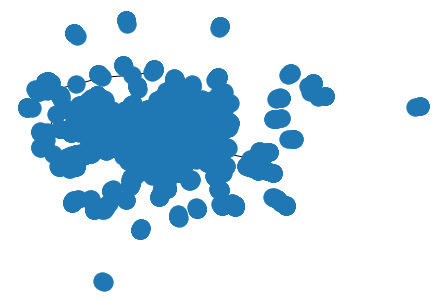

In [0]:
# f = plt.figure()
# nx.draw(G, with_labels=False)
# plt.show()

In [0]:
# communities = community.greedy_modularity_communities(G)
# for i,c in enumerate(communities):
#     print(i,c)

In [0]:
# try a clustering method that utilizes the edge weights
communities2 = community.asyn_lpa_communities(G, weight='weight', seed=42)

In [0]:
num_communities = 0
community_items = set()
cluster_nodes = []
n_nodes = []
weight_avgs = []
weight_sums = []
weight_maxs = []
weight_mins = []
weight_stds = []
for i,c in enumerate(communities2):
    num_communities += 1
    community_items = community_items | set(c)
    nodelist = list(c)
    n_nodes.append(len(nodelist))
    edgeweights = []
    for m in range(n_nodes[-1]-1):
        for n in range(m+1,n_nodes[-1]):
            try:
                edgeweights.append(G.edges[nodelist[m], nodelist[n]]['weight'])
            except:
                pass
    cluster_nodes.append(nodelist)
    weight_avgs.append(np.mean(edgeweights))
    weight_sums.append(np.sum(edgeweights))
    weight_maxs.append(np.max(edgeweights))
    weight_mins.append(np.min(edgeweights))
    weight_stds.append(np.std(edgeweights))
print(num_communities)
print(len(community_items))

1535
13178


In [0]:
s1 = set(testgraph.loc[:]['item1_id'])
s2 = set(testgraph.loc[:]['item2_id'])
s3 = s1 | s2
print(len(s3))
print(30 in s3)
print(22154 in s3)
# looks ok... all nodes in the graph are represented in the communities; not sure if all test items are in the set of nodes though

13178
True
True


In [0]:
print(len(weight_avgs))
weight_avgs = [round(x) for x in weight_avgs]
community_df = pd.DataFrame({'n_nodes':n_nodes,'w_avg':weight_avgs,'w_sum':weight_sums,'w_max':weight_maxs,'w_min':weight_mins,'w_std':weight_stds,'item_id':cluster_nodes})
print(community_df.head())
print("\n")
print(community_df.describe())

1535
   n_nodes  w_avg   w_sum  w_max  w_min     w_std                                                                                                                                                       item_id
0       13    521   21368   1004    400   159.766                                                                             [10976, 4033, 10978, 10972, 10977, 1256, 9001, 10974, 10975, 31, 10973, 30, 5343]
1        2   2412    2412   2412   2412         0                                                                                                                                                      [32, 33]
2       21   8178  556092  34800    436 7,796.446               [897, 10774, 19253, 17598, 10564, 10565, 10566, 10567, 20549, 17991, 10324, 10325, 10326, 10327, 10328, 10329, 10330, 10331, 19049, 19051, 895]
3       13    968   16452   1068    108   220.504                                                                   [19716, 19717, 19718, 19719, 19720, 19723, 1547

In [0]:
community_df.w_avg.nunique()
# can't use this as a category code because not unique among clusters,
# but I want to use the average cluster weights property to encode the cluster category
# (higher numbers for category code --> stronger clustering; may be useful to have this correlation instead of random generation of category codes)

965

In [0]:
# so, I will sort on w_avg, then on number of nodes as perhaps the next most important defining characteristic of a given cluster
#  and, to make the categorization unique, I will take the w_avg value and sum it with the index (row number)...
#     (with the sorting, this favors even more the clusters with high average item-to-item similarity)
community_df = community_df.sort_values(['w_avg','n_nodes']).reset_index(drop=True)
community_df['item_cluster_id'] = community_df.index + community_df['w_avg']
community_df.head()

,n_nodes,w_avg,w_sum,w_max,w_min,w_std,item_id,item_cluster_id
0,3,104,208,104,104,0,"[424, 388, 311]",104
1,3,104,208,104,104,0,"[19297, 8491, 21478]",105
2,4,104,312,104,104,0,"[16376, 12123, 3667, 7557]",106
3,5,104,1040,104,104,0,"[5841, 5842, 5843, 5844, 5845]",107
4,5,104,416,104,104,0,"[14946, 9289, 16041, 1975, 1979]",108


In [0]:
# unravel / explode the cluster node lists... we know this will not duplicate item ids, from the counting we did above
item_clusters = community_df.copy(deep=True).explode('item_id').reset_index().rename(columns = {'index':'cluster_number'})
item_clusters.head()

,cluster_number,n_nodes,w_avg,w_sum,w_max,w_min,w_std,item_id,item_cluster_id
0,0,3,104,208,104,104,0,424,104
1,0,3,104,208,104,104,0,388,104
2,0,3,104,208,104,104,0,311,104
3,1,3,104,208,104,104,0,19297,105
4,1,3,104,208,104,104,0,8491,105


In [0]:
items_clustered = items_clean_delimited[['item_id','i_cat_id','i_tested','item_name']].merge(item_clusters,on='item_id',how='left')
print(items_clustered.head())
items_clustered = items_clustered[['item_id','i_cat_id','item_cluster_id','i_tested','cluster_number','n_nodes','w_avg','w_sum','w_max','w_min','w_std','item_name']]
items_clustered.columns = ['item_id','item_category_id','item_cluster_id','item_tested','cluster_number','n_items_in_cluster','w_avg','w_sum','w_max','w_min','w_std','item_name']
print("\n")
print(items_clustered.head())
print("\n")
print(items_clustered.tail(30))

  item_id  i_cat_id  i_tested                                                                                         item_name  cluster_number  n_nodes  w_avg  w_sum  w_max  w_min     w_std  item_cluster_id
0       0        40     False                                                               movie dvd power in glamor plast dvd             nan      nan    nan    nan    nan    nan       nan              nan
1       1        76     False  program home and office digital abbyy finereader 12 professional edition full pc digital version            1303        8   2233  20100  14052    228 4,208.139             3536
2       2        40     False                                                                        movie dvd in glory unv dvd             nan      nan    nan    nan    nan    nan       nan              nan
3       3        40     False                                                                      movie dvd blue wave univ dvd             nan      nan    nan    nan  

In [0]:
# how many test items are represented by clusters?
tested_clustered = items_clustered[items_clustered.item_tested==True][['item_id','item_category_id','item_cluster_id','item_name']]
tested_clustered['unclustered'] = tested_clustered.apply(lambda x: np.NaN if x.item_cluster_id > 0  else x.item_id, axis = 1)
print(tested_clustered.head(20))
print('\n')
print(tested_clustered.item_id.nunique())
unclustered = tested_clustered.unclustered.unique()
unclustered = [x for x in unclustered if x > 0]
print(len(unclustered))
train_items = sales_train.item_id.unique()
print(len(train_items))
print(len(items))
untrained = [x for x in unclustered if x not in train_items]
print(len(untrained))
print(len(items) - len(train_items) - len(untrained))

   item_id  item_category_id  item_cluster_id                                                                                        item_name  unclustered
30      30                40             1226                                                  movie dvd 007 coordinate 007 james bond skyfall          nan
31      31                37             1226                                movie bluray dvd 007 coordinate 007 james bond skyfall bluray dvd          nan
32      32                40             3756                                                                                movie dvd 1 and 1          nan
33      33                37             3756                                                              movie bluray dvd 1 and 1 bluray dvd          nan
38      38                41              nan                              cinema collector 10 most popular comedy twentieth century 10dvd rem           38
42      42                57              197                   

In [0]:
# revert to original item_category_id if item is not in clustered items
items_clustered['cluster_code'] = items_clustered.apply(lambda x: x.item_cluster_id if x.item_cluster_id > 0 else x.item_category_id, axis = 1)
items_clustered.head(50)

,item_id,item_category_id,item_cluster_id,item_tested,cluster_number,n_items_in_cluster,w_avg,w_sum,w_max,w_min,w_std,item_name,cluster_code
0,0,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd power in glamor plast dvd,40
1,1,76,3536,False,1303,8,2233,20100,14052,228,"4,208.139",program home and office digital abbyy finereader 12 professional edition full pc digital version,3536
2,2,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd in glory unv dvd,40
3,3,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd blue wave univ dvd,40
4,4,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd box glass dvd,40
5,5,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd new american graffiti uni dvd,40
6,6,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd shot goal uni dvd,40
7,7,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd shot goal 2 uni dvd,40
8,8,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd tea mussolini dvd,40
9,9,40,nan,False,nan,nan,nan,nan,nan,nan,nan,movie dvd shugarlendsky express uni dvd,40


In [0]:
# save what we have; maybe refine later

compression_opts = dict(method='gzip',
                        archive_name='items_clustered.csv')  
items_clustered.to_csv('data_output/items_clustered.csv.gz', index=False, compression=compression_opts)

#XX) Below this markdown cell can be ignored

These are just code snippets I used to debug how to accomplish some of the tasks above.  I may want to revisit them some day, so I am too scared to just delete them. :)

###Continue on the work to vectorize item names and compute similarities between items (this section should be grouped with the above section eventually, but I have it set apart for now, so it is easy to find)

---

---


######Consider as special the n-grams that follow certain descriptive keywords such as "by" or "for" or "from" (? TBD)

In [0]:
# these are words we could consider to highlight n-grams that follow these words, similar to the thinking that "delimited" words may be special
key_modifiers = "by,for,from"  
print(lemmatizer.lemmatize('as'))


a


In [0]:
# Inspecting the "delimited" n-grams, I've considered the following for use in vectorizing our item names

# Regarding the use of NLTK stopwords, meh... a lot of these stopwords are irrelevant regarding excess text in our item names... 
#    We really should make our own stopword list
s = "a,the,an,only,more,are,any,on,your,just,it,its,it's,has,with,for,by,from"

# make some dictionaries to "lemmatize" certain keywords into standardized 1-grams
# volumes/editions
key_descriptors = {'1': 'first,1st,1ed,v1,vol1,volume1,ver1,version1,edition1,original,standard'}
key_descriptors['2'] = 'second,2nd,ii,2ed,v2,vol2,volume2,ver2,version2,edition2,updated,revised'
key_descriptors['3'] = 'third,3rd,iii,3ed,v3,vol3,volume3,ver3,version3,edition3'
key_descriptors['4'] = 'fourth,4th,iiii,4ed,v4,vol4,volume4,ver4,version4,edition4'
# special, highlighted items
key_descriptors['special'] = 'collector,collection,premium,platinum,gold,silver,black,boxset,classic,trilogy'
# items dealing with business
key_descriptors['biz'] = 'company,business,enterprise,firm,professional'
# items likely to be a Russian version, or translated into Russian
key_descriptors['rus'] = 'russian,rus,rusv,translate,translated'
# items likely to be in English
key_descriptors['eng'] = 'english,eng,engl'
# relatively frequent descriptors that should have substantial weight in the item name vectorization
key_descriptors['0'] = 'essential,preorder,supplement,addition,catalog,reprint'

key_platforms = '1c,1cpublishing,playstation,psp,ps2,ps3,ps4,psvita,psn,pc,android,iphone,phone,tablet,'
key_platforms += 'ipad,xbox,xbox 360,xbox one,xbox360,xboxone,xbox1,xone,apple,mac,microsoft,windows,98,live,marvel,cech4008c'

key_formats = {'dvd': 'pcdvd,dvd,2dvd,3dvd,4dvd,5dvd,6dvd,dvddigipack,dvdbox,mp3dvd,dvdbook,dvdcd'}
key_formats['cd'] = 'cd,mp3cd,2cd,cdbox,compactdisk,audiocd,cddigipack'
key_formats['movie'] = 'bd,2bd,3bd,bluray,blueray,4k,movie,dvdmovie,moviedvd,dvdbd,bddvd,2dvdbd,tv'
key_formats['0'] = 'book,audiobook,digibook,wb,wd,mp3,digipack,jewel,umdcase,keychain,ac,6cm,8cm,12cm,14cm,dicomp,glass,delivery,online,gb,tb,mb'

special_words = 'komplvoprsertekzam1s,softklab,transformer,hobbit,barbie,middleearth,'  # plus any 4-digit numbers like 1812, 2014,...
special_words += 'red30,red20,alien,toy,region,bbc,batman,scee,cyrus,mtg,berserk,disney,spell,'
special_words += 'buh8,b01,retribution,metodmaterialy,destiny,wolfenstein,hhkata,luntik,'
special_words += 'paragon,42,72,buka,injustice,call,action,universal,zhelboks,fallout,cuh1108a,16,cechzc2e,'
special_words += 'pch1108za01,dinosaur,braveheart,titanic,infamous,spiderman,armageddon,universe,'
special_words += 'rezhversiya,outcast,wheelbarrow,yellow,inquisition,pch1008za01,zolushka,xmen,'
special_words += 'metro,battlefront,cuh1208b,wargame,operation,cech3008b,poirot,hhkatv,kitchen,'
special_words += 'icecrown,underworld,shepherd,thief,sensor,shrek,oceans,castlevania,murdered,'
special_words += 'madagascar,shelter,devastation,deadpool,incredibles,jungle,titanfall,pspe1008,cech2508b,skyrim,avatar,maleficent,invizimals,heracles,phantom,toysmlk,aladdin'

#key_categories = 1-grams from all item_categories_augmented (0,1,2,3,4 columns)
  


In [0]:
# Get word counts from en_50k for the delimited terms:
#   combine all words in delim_name_list, and search one-by-one through en_50k
#   create a column for words with zero counts
#   create a column for words with 1 to 1000 counts

In [0]:
en50k_word_list = en_50k.word.to_numpy(dtype='str')
swfreq = []
for sw in special_words.split(","):
    sw_50k_rank = np.where(en50k_word_list == sw)[0]
    if len(sw_50k_rank) > 0:
        swfreq.append(en_50k.at[sw_50k_rank[0],'word_count'])
    else:
        swfreq.append(0)

special_wds_df = pd.DataFrame({"word": special_words.split(","), "counts_50k": swfreq}).sort_values('counts_50k')
print(special_wds_df.head())
print(special_wds_df.describe())

                    word  counts_50k
0   komplvoprsertekzam1s           0
24           wolfenstein           0
25                hhkata           0
26                luntik           0
28                    42           0
       counts_50k
count          91
mean   10,899.868
std    60,340.351
min             0
25%             0
50%           624
75%          3637
max        572997


In [0]:
# inspect item names more closely to see how they relate to the rare delimited words, and to 
#    help understand what certain unusual terms mean 
# "firms" = big record label 
# "figure" = digital version; not hardcopy
#  komplvoprsertekzam1s = Complete Set of Certification Exam. 1C

# enter the desired item_ids here:
to_plot = [617,618]

item_plot_df = sales_train[sales_train.item_id.isin(to_plot)] 
print(item_plot_df.head())

# what does "figure" mean in category name? --> DIGITAL VERSION (as opposed to hardcopy)
# whereas, "Digital Version" in item name actually seems to indicate it is downloaded rather than obtained from DVD, for example

#fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([77,78])][['item_id','en_item_name','item_category_id','category']] 
#fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([43,44])][['item_id','en_item_name','item_category_id','category']] 
#fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([75,76])][['item_id','en_item_name','item_category_id','category']] 
fig_cat_df = items_transl_with_cat[items_transl_with_cat.item_category_id.isin([6])][['item_id','en_item_name','item_category_id','category']] 
print(fig_cat_df.tail())

# see what some of these 'rare' word 1-grams are:
# get item names from rare words
rare_words = 'cech2508b,komplvoprsertekzam1s'
#reg_pattern = re.compile('|'.join(rare_words.split(',')), flags=re.IGNORECASE)
any_rare_words = '|'.join(rare_words.split(','))
rare_items_df = items_delimited[items_delimited.clean_item_name.str.contains(any_rare_words, case=False, na=False)][['item_id','i_cat_id','i_tested','item_name','clean_item_name']] 
print(rare_items_df.head(50))
print(items[items['item_id']==13380])

# "certification exam" is not present in the cleaned, translated item names, nor is "certification"
# "exam " is present in only 26 items... so, komplvoprsertekzam1s is broader than 'exam'
certification = items_delimited[items_delimited.clean_item_name.str.contains('exam ', case=False, na=False)][['item_id','i_cat_id','i_tested','item_name','clean_item_name']] 
print(len(certification))
print(certification.head())

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
505355  2013-05-07               4       55      618         172             1
933109  2013-09-27               8       55      618         172             1
933124  2013-09-06               8       55      618         172             1
1088977 2013-11-24              10       55      618         172             1
1088978 2013-11-03              10       55      618         172             1
       item_id                                                                        en_item_name  item_category_id                category
8448      8448                                   Accessory: Xbox 360 Hard Drive 500 GB (6FM-00003)                 6  Accessories - XBOX 360
8449      8449                  Accessory: Xbox 360 Wireless Controller Chrome magenta (43G-00062)                 6  Accessories - XBOX 360
8450      8450                    Accessory: Xbox 360 Wireless Controller Black Chrome (43G-00059)     

######Items containing "1C" in their name

In [0]:
# I'm curious about items containing "1C" ... there seem to be quite a few, and if I'm not mistaken,
#    1C is an ERP like Oracle or SAP, but 1C is based in Russia.  Let's see how many items have 1C
#    in their item_name, and what categories these belong to, and what the item names look like (what are common words that accompany "1C"?)
items_delimited_1c = items_clean_delimited.copy(deep=True)
# delete the wide "item_name" column so we can read more of the data table width-wise
items_delimited_1c = items_delimited_1c.drop(['delim_name_list','d_len','d_maxgram'], axis=1)
items_delimited_1c.head()


,item_id,i_cat_id,i_tested,item_name
0,0,40,False,power in glamor plast dvd
1,1,76,False,abbyy finereader 12 professional edition full pc digital version
2,2,40,False,in the glory unv dvd
3,3,40,False,blue wave univ dvd
4,4,40,False,box glass dvd


###some clustering stuff to ignore

---

---


In [0]:

for i,c in enumerate(communities2):
    #cl = 1e4*cluster.average_clustering(G,c,'weight')
    nodelist = list(c)
    edgeweights = []
    for m in range(len(nodelist)-1):
        for n in range(m+1,len(nodelist)):
            try:
                edgeweights.append(G.edges[nodelist[m], nodelist[n]]['weight'])
            except:
                pass
    weight_ave = np.mean(edgeweights)
    weight_sum = np.sum(edgeweights)
    weight_max = np.max(edgeweights)
    weight_min = np.min(edgeweights)
    weight_std = np.std(edgeweights)
    print(f'{i:04d} av:{weight_ave:6.0f} sum:{weight_sum:6.0f} max:{weight_max:6.0f} min:{weight_min:6.0f} std:{weight_std:6.0f} nodes:{c}')

0000 av:   555 sum: 14980 max:  1004 min:   400 std:   177 nodes:{10976, 4033, 10978, 10972, 10977, 1256, 9001, 10974, 10975, 31, 10973, 30, 5343}
0001 av:  2412 sum:  2412 max:  2412 min:  2412 std:     0 nodes:{32, 33}
0002 av:   270 sum:  4328 max:   284 min:   252 std:     9 nodes:{21472, 18336, 10946, 21473, 20006, 10887, 10886, 45, 10578, 18516, 53, 16253}
0003 av:   490 sum:  4900 max:   580 min:   480 std:    30 nodes:{19927, 14214, 14215, 14216, 17610, 17620, 4695, 56, 57, 4699, 4700}
0004 av:   264 sum:  1320 max:   264 min:   264 std:     0 nodes:{11809, 18211, 5353, 10889, 18411, 10927}
0005 av:   280 sum:   280 max:   280 min:   280 std:     0 nodes:{34, 62}
0006 av:  2625 sum:  7876 max:  2628 min:  2624 std:     2 nodes:{64, 66, 67}
0007 av:  1685 sum: 16848 max: 10092 min:   676 std:  2803 nodes:{20193, 69, 70, 17641, 8436, 9468, 12222}
0008 av:  7262 sum: 29048 max: 26508 min:   740 std: 11112 nodes:{12218, 853, 797, 798}
0009 av:   942 sum:  7532 max:  1752 min:   592

###some word vector encoding stuff to ignore

---

---


In [0]:
# encode an item name using all 'delimited' n-grams:
item_vectors2 = pd.DataFrame(np.zeros((len(items_clean_delimited),total_dupe_grams), dtype = np.int16))


In [0]:
%%time   
# takes about 9 minutes without GPU

gram_idx = 0
for n in range(1,len(gram_freqs)+1):
    grams = gram_freqs[n].index
    for g in grams:
        gram_pattern = re.compile(r'\b' + g + r'\b')  # I'm not looking for partial words; n-grams must match at word boundaries
        for i in range(len(items_clean_delimited)):
            if gram_pattern.search(items_clean_delimited.at[i,'item_name']):
                item_vectors2.iloc[i,gram_idx] = 2*n  # second try at this, set equal to 2x length n of n-gram for weighting (instead of previous 1x)
        gram_idx += 1



CPU times: user 8min 58s, sys: 61.9 ms, total: 8min 58s
Wall time: 8min 58s


In [0]:
# save the word vectors as a compressed csv file
#   (170MB uncompressed... won't push to GitHub simply)
#   gzip -->  400 kB !!

compression_opts = dict(method='gzip',
                        archive_name='item_vectors2.csv')  
item_vectors2.to_csv('data_output/item_vectors2.csv.gz', index=False, compression=compression_opts)


######Below here are some code snippets for future reference; ignore please

</br>

</br>

---
---

</br>

</br>


In [0]:
'''
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
MULTIPLE_WHITESPACE_RE = re.compile('[ ]{2,}')
STOPWORDS = set(stopwords.words('english'))  #using "set" speeds things up a little; note all stopwords are in lowercase
#print("." in STOPWORDS)
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text... need to do this before removing stopwords because stopwords are all lowercase
    text = REPLACE_BY_SPACE_RE.sub(' ',text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('',text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = MULTIPLE_WHITESPACE_RE.sub(' ',text)
    text = " ".join([word for word in text.split(" ") if word not in stopwords.words('english')]) # delete stopwords from text
 
    return text
'''


#item_vectors.to_csv("data_output/item_vectors.csv", index=False)
# item_vectors[:][:2000].to_csv("data_output/item_vectors1.csv", index=False)
# item_vectors[:][2000:].to_csv("data_output/item_vectors2.csv", index=False)


# item_vectors = pd.DataFrame(np.zeros((21700,4043), dtype = np.int16))

# compression_opts = dict(method='gzip',
#                         archive_name='item_vectors.csv')  
# item_vectors.to_csv('item_vectors.csv.gz', compression=compression_opts)

# keep this cell for future reference
keep = True